In [1]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from sklearn import mixture
import src.mymodel.gmm as mygmm
from sklearn.cluster import KMeans
import time
%load_ext autoreload
%autoreload 2

(-400.07181312691716, 823.677663397796, -549.480223558491, 961.5423988027908)

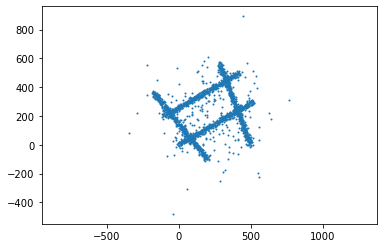

In [3]:
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
#         if v[1]/v[0] <4:
#             continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
#         ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        plt.axis('equal')
#     plt.xticks(())
#     plt.yticks(())
    plt.title(title)
    plt.xlim(X[:,0].min(),X[:,0].max())
    plt.ylim(X[:,1].min(),X[:,1].max())
    
def sample_line(x0,y0,L,th,sigm,n_samples):
    t = np.linspace(0,L,num =n_samples)
    x = x0 + np.cos(th)*t + np.random.normal(0, sigm, n_samples)
    y = y0 + np.sin(th)*t + np.random.normal(0, sigm, n_samples)
    
    return np.c_[x,y]
    
# Number of samples per component
n_samples = 500


sigm =10
L = 600

x0,y0 = 0,0
th = np.pi/6
X = sample_line(x0,y0,L,th,sigm,n_samples)

x0,y0 =  200,-100
th = np.pi/6 + np.pi*0.55
X1 = sample_line(x0,y0,L,th,sigm,n_samples)
X = np.vstack((X,X1))

x0,y0 =  500,0
th = np.pi/6 + np.pi*0.45
X1 = sample_line(x0,y0,L,th,sigm,n_samples)
X = np.vstack((X,X1))

x0,y0 = -100,200
th = np.pi/6
X1 = sample_line(x0,y0,L,th,sigm,n_samples)
X = np.vstack((X,X1))

#noise
x_noise = np.random.normal(200, 200, 200)
y_noise = np.random.normal(200, 200, 200)
X1 = np.c_[x_noise,y_noise]
X = np.vstack((X,X1))

idx = (X[:,0]<450) & (X[:,0]> 350) & (X[:,1]< 300) & (X[:,1]> 150)

X  = np.delete(X,idx,axis=0)

plt.scatter(X[:,0],X[:,1],s=1)
plt.axis('equal')

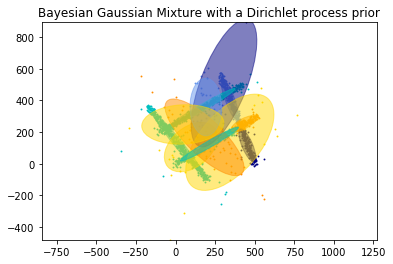

In [4]:
# Fit a Gaussian mixture with EM using five components
# gmm = mixture.GaussianMixture(n_components=10, covariance_type="full").fit(X)
# plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

# # Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=20, covariance_type="full",max_iter=100).fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    0,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)

plt.show()
